In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style, rc, font_manager
%matplotlib inline
# style 설정
# https://fredriccliver.medium.com/cant-not-see-axis-label-of-jupyter-notebook-in-the-dark-theme-vscode-df31a3ee121
# print(plt.style.available)
# style.use('dark_background')
# style.use('seaborn-darkgrid')
style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
# font 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import random
import ast
import json
import numpy as np
from scipy.stats import skew


In [4]:
# read data
#df = pd.read_csv("./card.click.ranking.base.1d.rs.1K.sr.csv")
#df = pd.read_csv("./card.click.ranking.base.1w.rs.1K.sr.csv")
# df = pd.read_csv("./card.click.ranking.base.1m.rs.1K.sr.csv")
df = pd.read_csv("./card.click.ranking.base.1m.rs.1K.v2.sr.csv")

def to_json(x):
    return ast.literal_eval(x)
df["id2clickCnt"] = df["id2clickCnt"].apply(to_json)
df["rank2clickCntAndId"] = df["rank2clickCntAndId"].apply(to_json)

df.head()

,search_keyword,qc,cc,ctr,uqc,ucc,uctr,numUsers,id2clickCnt,rank2clickCntAndId
0,이케아 선반,457,252,55.142232,166,67,40.361446,75,"{'13062827': 16, '14504075': 11, '10319914': 1...","{'1': {'clickCnt': 16, 'id': '13062827'}, '2':..."
1,레드플래닛,141,115,81.560284,19,18,94.736842,25,"{'13999226': 7, '11716960': 6, '14563737': 6, ...","{'1': {'clickCnt': 6, 'id': '11716960'}, '2': ..."
2,후라이펜,645,247,38.294574,332,124,37.349398,126,"{'12156780': 13, '14781573': 13, '11943797': 9...","{'1': {'clickCnt': 13, 'id': '14781573'}, '2':..."
3,책상 위,56,31,55.357143,17,7,41.176471,8,"{'7923949': 2, '9674794': 2, '11489940': 2, '3...","{'1': {'clickCnt': 0, 'id': '184704'}, '2': {'..."
4,무선조명,480,310,64.583333,128,68,53.125000,76,"{'15214481': 17, '11254308': 12, '15084231': 1...","{'1': {'clickCnt': 4, 'id': '15170820'}, '2': ..."


In [3]:
df.describe()
#df[df.qc < df.quantile(0.95)["qc"]].describe()

,qc,cc,ctr,uqc,ucc,uctr
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,103.081000,71.696000,187.689106,23.344000,13.151000,196.706010
std,444.272273,345.837252,157.571981,77.435728,46.935223,145.074826
min,11.000000,1.000000,52.380952,1.000000,1.000000,100.000000
25%,15.000000,10.000000,123.753220,3.000000,2.000000,111.111111
50%,26.000000,17.000000,146.666667,7.000000,4.000000,150.000000
75%,60.000000,39.000000,194.684211,16.000000,9.000000,215.705128
max,10164.000000,8388.000000,2500.000000,1349.000000,996.000000,1400.000000


## QC 분포


<AxesSubplot:ylabel='Frequency'>

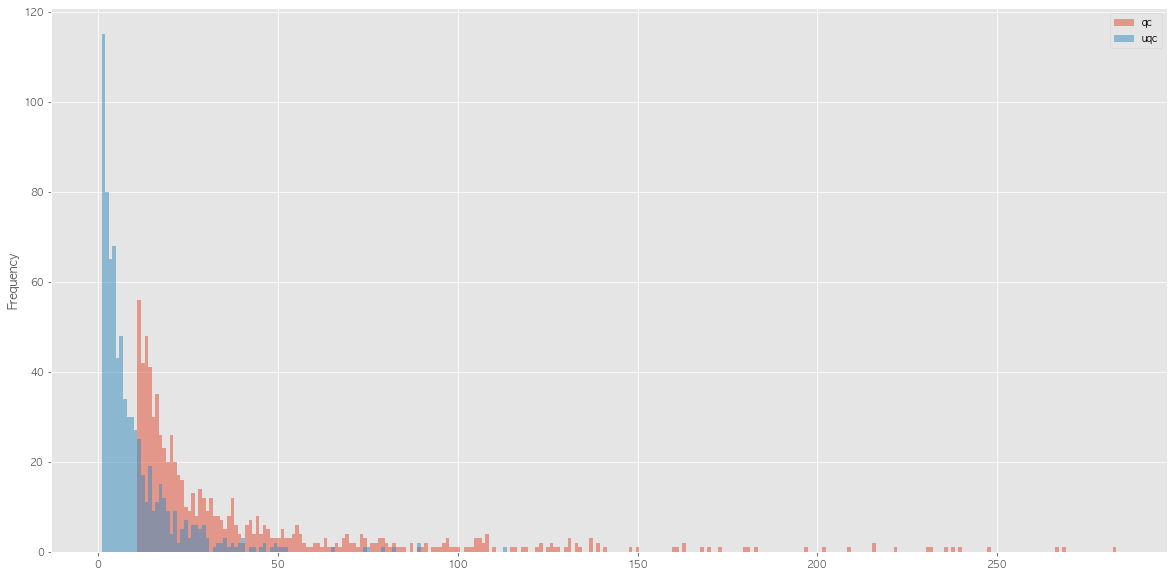

In [55]:
sub_df = df[df.qc < df.quantile(0.95)["qc"]][["qc", "uqc"]]
sub_df.plot.hist(bins=sub_df["qc"].max(), figsize=(20, 10), alpha=0.5)

## 클릭 데이터 분포
* 사진: avgCTR=3.37, avgmCTR=2.77, maxCTR=50.79365079365079, avgClick=2.37, maxClick=172.00
* 스토어: avgCTR=3.95, avgmCTR=3.30, maxCTR=72.22222222222221, avgClick=4.28, maxClick=287.00
* 집들이: avgCTR=3.11, avgmCTR=2.58, maxCTR=46.666666666666664, avgClick=2.39, maxClick=87.00
* 노하우: avgCTR=3.73, avgmCTR=3.04, maxCTR=53.333333333333336, avgClick=1.93, maxClick=64.00
* 질문과답변: avgCTR=4.25, avgmCTR=3.33, maxCTR=41.66666666666667, avgClick=1.19, maxClick=12.00
---
* 사진: 문서 평균 CTR=0.71, 평균 mCTR=0.58
* 스토어: 문서 평균 CTR=0.98, 평균 mCTR=0.82
* 집들이: 문서 평균 CTR=0.59, 평균 mCTR=0.49
* 노하우: 문서 평균 CTR=0.73, 평균 mCTR=0.60
* 질문과답변: 문서 평균 CTR=0.41, 평균 mCTR=0.32

In [86]:

def draw_dist(point_list, title=None, add=False, hline=None):
    if not add:
        plt.figure(figsize=(30, 2))
    plt.xticks(range(1, len(point_list)+1))
    plt.plot(range(1, len(point_list)+1), point_list)
    if hline is not None:
        plt.axhline(y=hline, color='b', linestyle='-')
    if title is not None:
        plt.title(title)

avgDocCTR: 0.47371543787188486


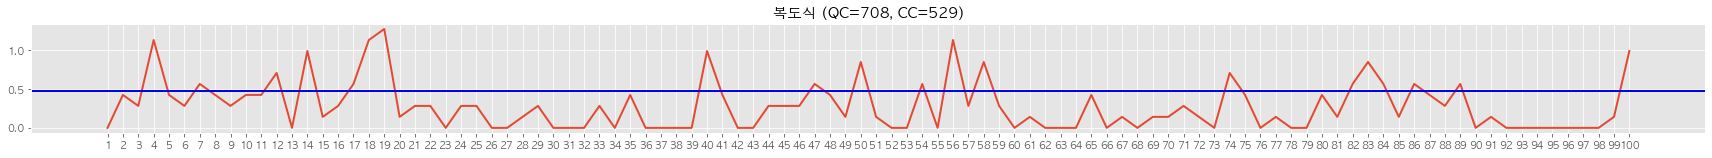

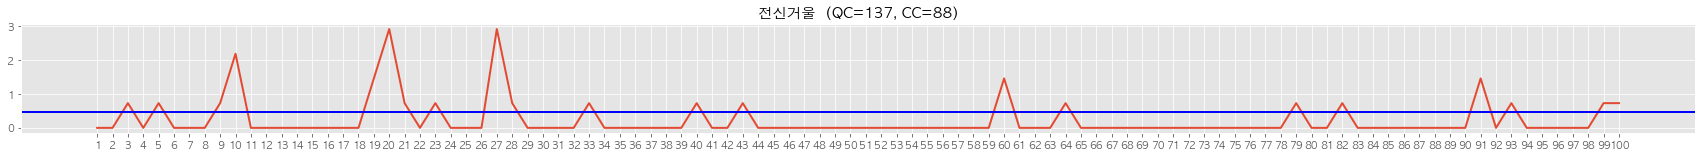

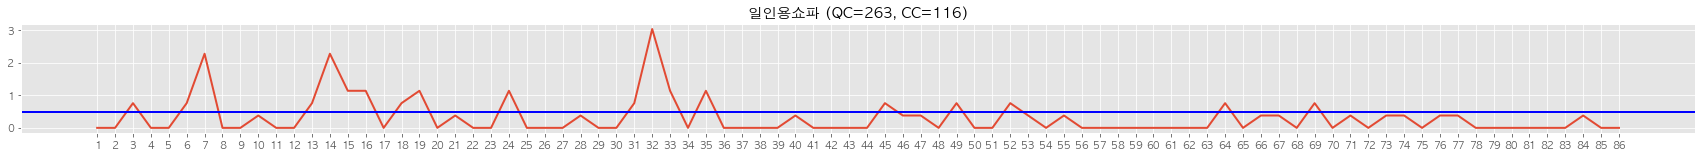

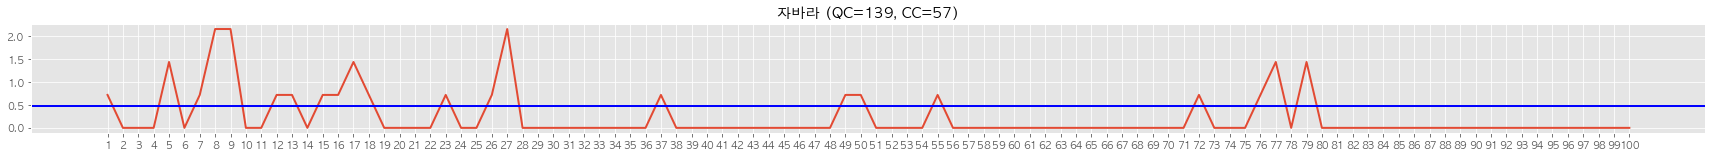

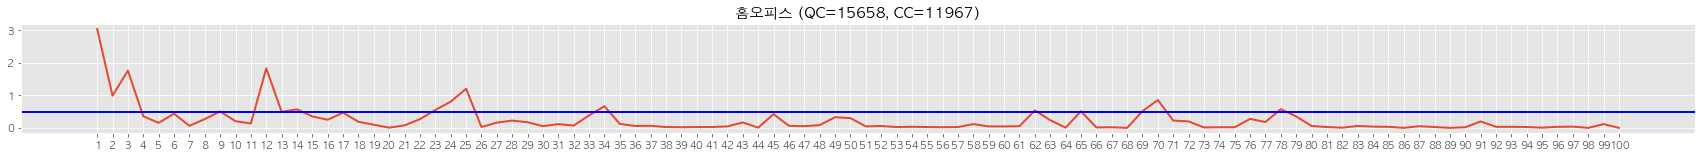

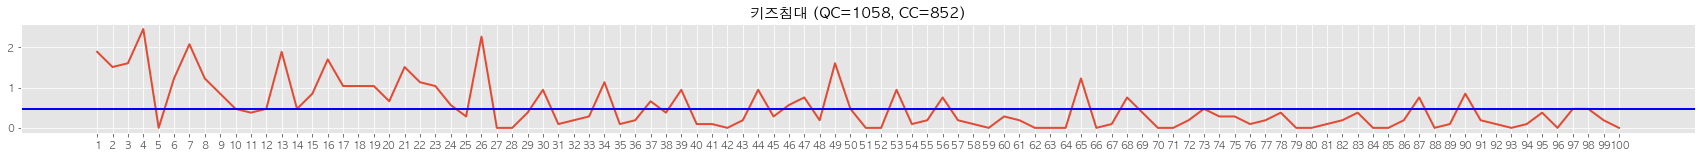

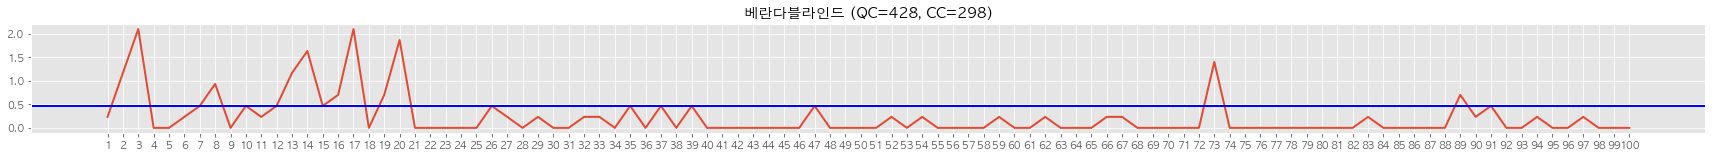

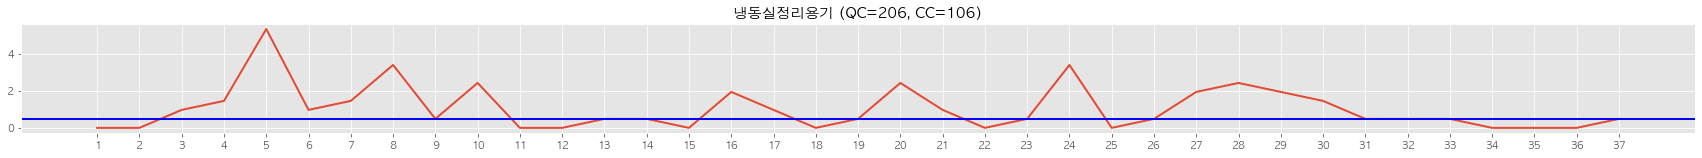

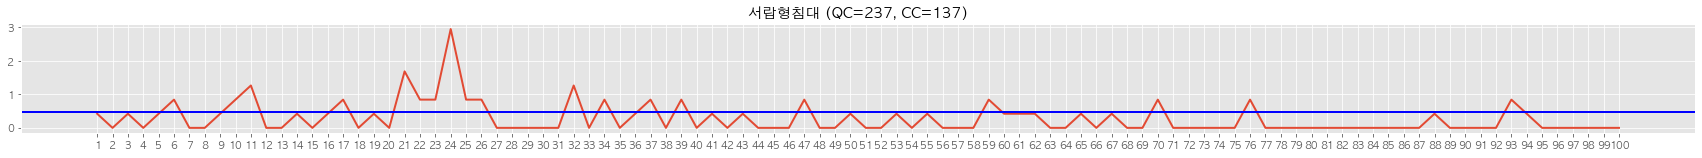

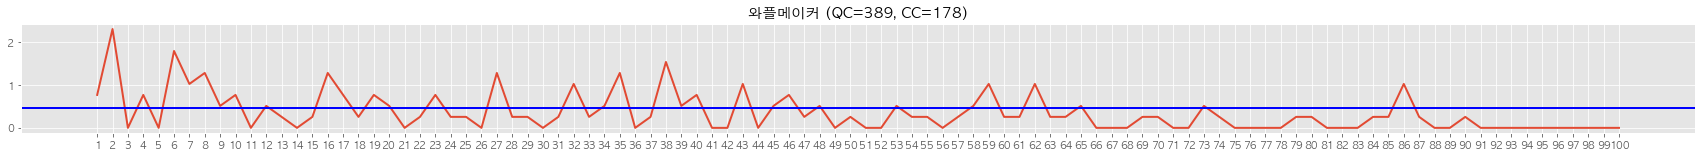

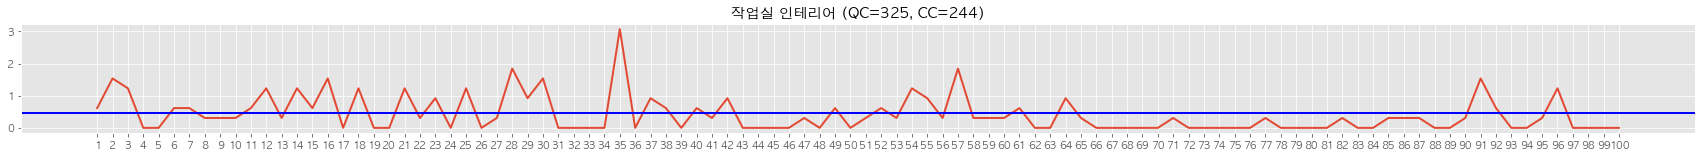

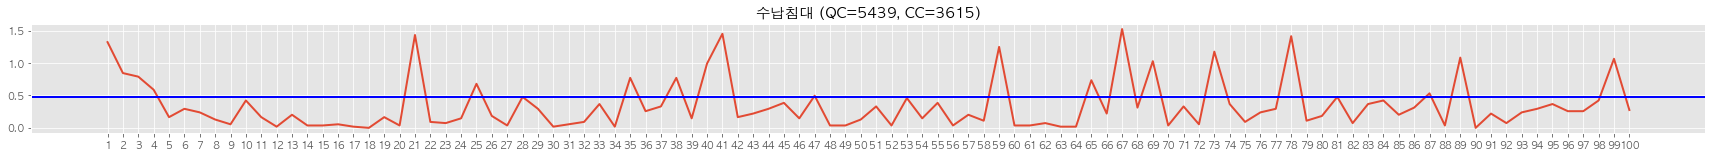

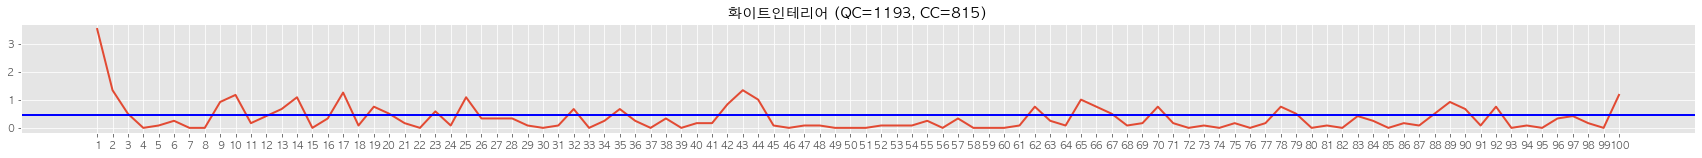

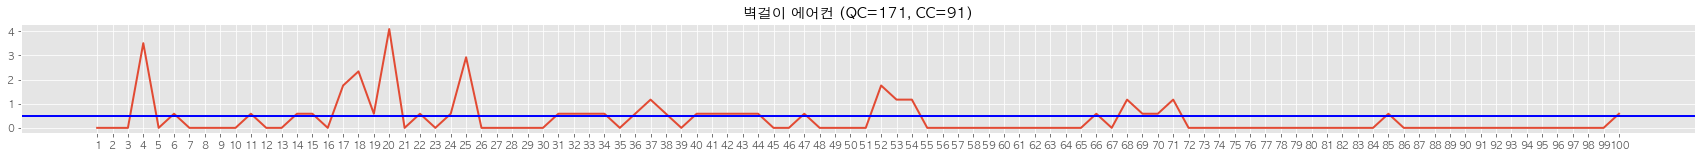

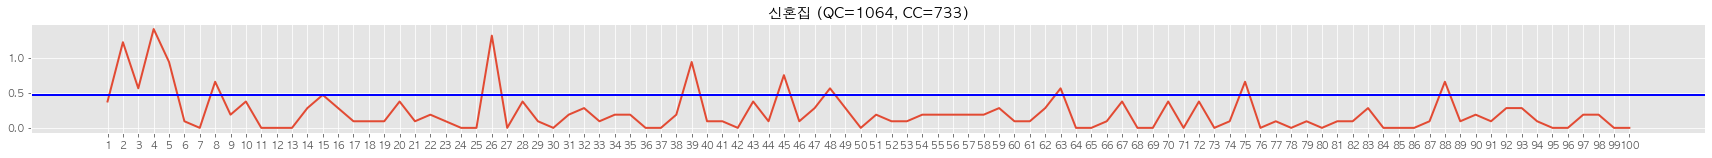

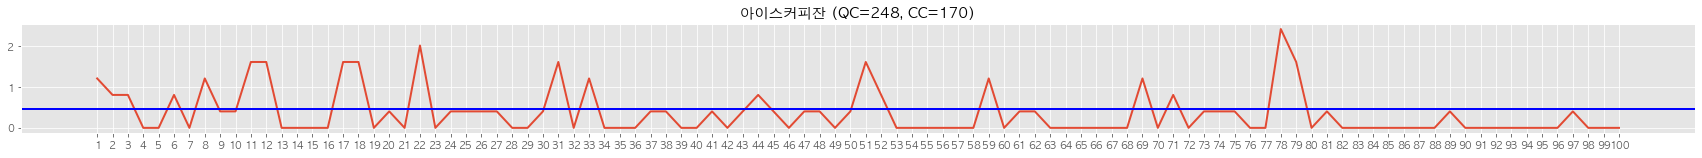

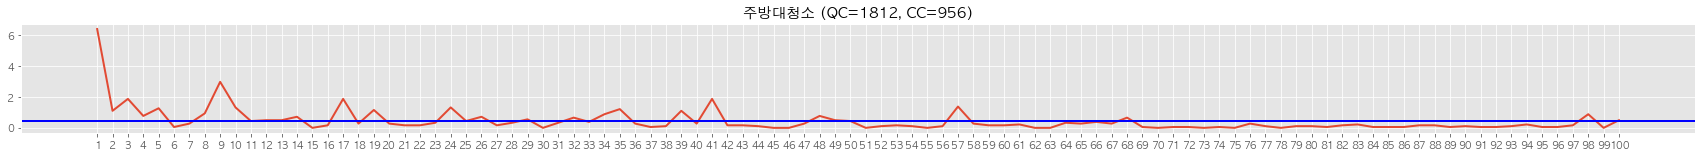

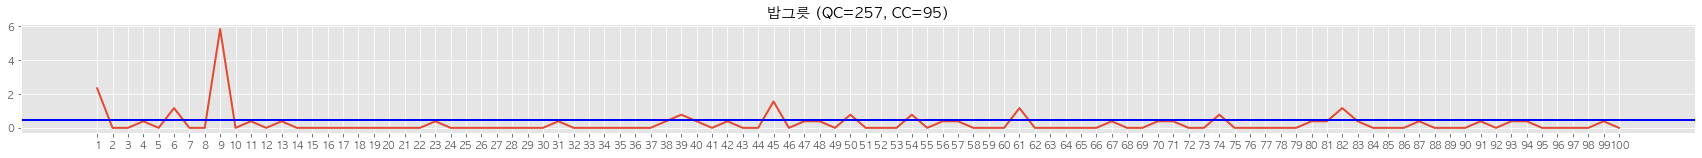

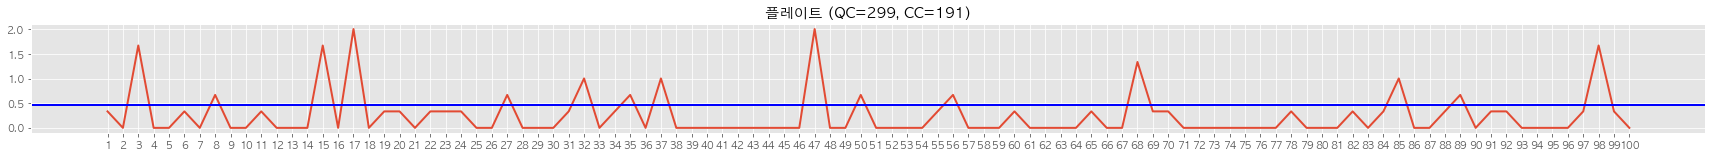

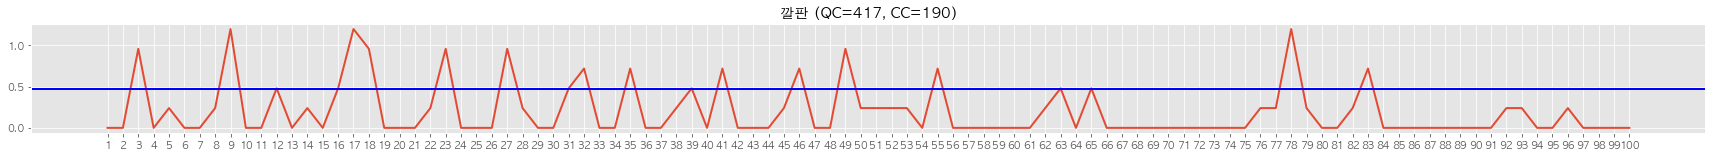

In [88]:
# UQC: 해당쿼리로 검색한 사용자수
# numUsers: 해당쿼리로 검색한 사용자 수 > 클릭한 사용자 수
uqc_mean = df["uqc"].mean()
uqc_75 = df["uqc"].quantile(0.75)
uqc_95 = df["uqc"].quantile(0.95)
uqc_99 = df["uqc"].quantile(0.99)

ctr_list = []
for idx, row in df.iterrows():
    ctr_list.extend([v["clickCnt"]/row["qc"]*100 for k, v in row["rank2clickCntAndId"].items() if int(k) <= 100])
avg_doc_ctr = np.mean(ctr_list)
print(f"avgDocCTR: {avg_doc_ctr}")

anchor = uqc_75
cnt = 0
for idx, row in df[df.uqc > uqc_75].iterrows():
    if cnt == 20: break
    click_list = [v["clickCnt"] for k, v in row["rank2clickCntAndId"].items() if int(k) <= 100]
    ctr_list = [v["clickCnt"]/row["qc"]*100 for k, v in row["rank2clickCntAndId"].items() if int(k) <= 100]
    draw_dist(ctr_list, title=f'{row["search_keyword"]} (QC={row["qc"]}, CC={row["cc"]})', hline=avg_doc_ctr)
    # draw_dist(click_list)
    cnt += 1
